<a href="https://colab.research.google.com/github/Cloud-li1/data-mining/blob/main/MAB_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Assignment 1

This program implment three algorithms to slove the multi-armed bandit problem, including Epsilon-Greedy, Upper Confidence Bound and Thompson Sampling algorithms.


## Game Definition

This part includes importing the necessary library and algorithms definition.

**Set Up**

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

**Defining a class and functions for Multi-Armed Bandit**

In [ ]:

class Bandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        # set the mean and standard deviation for each bandit machine
        self.means=np.random.normal(0, 1, self.num_arms)
        self.standards=np.random.uniform(0, 1, self.num_arms)  # Use the random function to generate variance
    def pull_arm(self, arm):
        # Pulling and receiving a stochastic reward
        return np.random.normal(self.means[arm],self.standards[arm])

    def best_arm(self):
        # Return index of the arm with the highest true value
        return np.argmax(self.means)

## Epsilon-Greedy

In [ ]:
# Exploration Strategy
# ε-greedy : given current estimated values of arms and exploration rate

class EGreedySimulation:
    def __init__(self, bandit, rate, num_plays):
        self.bandit = bandit
        self.rate = rate
        self.num_plays = num_plays
        self.estimated_values = np.zeros(bandit.num_arms)
        self.pull_times = np.zeros(bandit.num_arms)

    def explore_exploit_policy(self):
        if np.random.random() < self.rate:
            # Exploration
            return np.random.choice(len(self.estimated_values))
        else:
            # Exploitation
            return np.argmax(self.estimated_values)

    def simulate(self):
        rewards = np.zeros(self.num_plays)
        optimal_times = np.zeros(self.num_plays)

        for round in range(self.num_plays):
            chosen_arm = self.explore_exploit_policy()
            reward = self.bandit.pull_arm(chosen_arm)
            self.pull_times[chosen_arm] += 1
            self.estimated_values[chosen_arm] += (reward - self.estimated_values[chosen_arm]) / self.pull_times[chosen_arm]
            rewards[round] = reward
            if chosen_arm == self.bandit.best_arm():
                optimal_times[round] = 1

        average_rewards = np.cumsum(rewards) / np.arange(1, self.num_plays + 1)
        average_optimal_times = np.cumsum(optimal_times) / np.arange(1, self.num_plays + 1)
        cumulative_rewards = np.cumsum(rewards)
        cumulative_optimal_times = np.cumsum(optimal_times)
        return average_rewards, average_optimal_times, cumulative_rewards, cumulative_optimal_times

##Upper Confidence Bound (UCB)

In [ ]:
class UCB_strategy:
    def __init__(self, num_arms,num_plays):
        self.num_arms = num_arms
        self.num_plays=num_plays
        # Set the counts and the values
        self.pull_times = np.zeros(num_arms)
        self.values = np.zeros(num_arms)
        return

    def select(self):
        # Try every arm
        for i in range(self.num_arms):
            if self.pull_times[i] == 0:
                return i
        # get the total tries
        total_times = sum(self.pull_times)
        # get the confidence bound for each arm, the last part is exploration part
        upper_confidence_bound = self.values + np.sqrt(np.log(total_times) / (self.pull_times + 1e-8))
        return np.argmax(upper_confidence_bound)

    def update(self, arm, reward):
        self.pull_times[arm] = self.pull_times[arm] + 1
        i_times = self.pull_times[arm]
        value = self.values[arm]
        # update the value function: value function store the average reward
        self.values[arm] += (reward-value)/float(i_times)
        # ((i_times-1)/float(i_times)) * value + (1/float(i_times)) * reward
        return

def ucbSimulation(bandit, num_plays):
    # initial ucb
    myUCB=UCB_strategy(bandit.num_arms,num_plays)
    rewards=np.zeros(num_plays)
    optimal_times = np.zeros(num_plays)
    for i in range (num_plays):
        chosen_arm=myUCB.select()
        reward=bandit.pull_arm(chosen_arm)
        myUCB.update(chosen_arm,reward)
        rewards[i]=reward
        if chosen_arm == bandit.best_arm():
            optimal_times[i] = 1  # Check if the best arm was pulled
    average_rewards = np.cumsum(rewards) / np.arange(1, num_plays + 1)
    average_optimal_times = np.cumsum(optimal_times) / np.arange(1, num_plays + 1)

    cumulative_rewards = np.cumsum(rewards)
    cumulative_optimal_times = np.cumsum(optimal_times)
    return average_rewards, average_optimal_times, cumulative_rewards, cumulative_optimal_times

## Thompson Sampling (TS)

In [ ]:
# expected click-through rate (CTR)
# CTR normally distributed with mean and standard deviation

class TS_strategy:
    def __init__(self, num_arms):
        self.n_arms = num_arms
        self.alpha = np.ones(num_arms)  # Success count for each arm
        self.beta = np.ones(num_arms)   # Failure count for each arm
        self.choices = []
        self.rewards = np.zeros((num_arms, 0))

    def select_arm(self):
        sampled_theta = [np.random.beta(a, b) for a, b in zip(self.alpha, self.beta)]
        return np.argmax(sampled_theta)

    def update(self, chosen_arm, reward):
        if reward > 0:
            self.alpha[chosen_arm] += 1
        else:
            self.beta[chosen_arm] += 1
         # Track chosen arm and reward
        self.choices.append(chosen_arm)
        reward_update = np.zeros(self.n_arms)
        reward_update[chosen_arm] = reward
        self.rewards = np.hstack([self.rewards, reward_update.reshape(-1, 1)])

def ThompsonSamplingSimulation(bandit, num_arms, num_plays):
  TSampling=TS_strategy(num_arms=num_arms)
  rewards = np.zeros(num_plays)
  optimal_times = np.zeros(num_plays)
  # Simulate the multi-armed bandit process
  for i in range(num_plays):
    chosen_arm = TSampling.select_arm()
    reward = bandit.pull_arm(chosen_arm)
    TSampling.update(chosen_arm, reward)
    rewards[i]=reward
    if chosen_arm == bandit.best_arm():
            optimal_times[i] = 1  # Check if the best arm was pulled
  total_reward = sum(rewards)

  average_rewards = np.cumsum(rewards) / np.arange(1, num_plays + 1)
  average_optimal_times = np.cumsum(optimal_times) / np.arange(1, num_plays + 1)
  cumulative_rewards = np.cumsum(rewards)
  cumulative_optimal_times = np.cumsum(optimal_times)

  return total_reward, cumulative_rewards, average_rewards, average_optimal_times, cumulative_optimal_times

##Running


**Run Multiple Trials and Average results**

In [ ]:
# Parameters
num_arms = 10  # arms: 5, 10, 20
num_plays = 2000
num_trials = 1000 #arbitrary value

**Runing e-greedy**

In [ ]:
# Set the exploration rates
exploration_rates = [0.0, 0.01, 0.1]

# Initialize dictionaries to store the results
e_greedy_avgRewards = {rate: np.zeros((num_trials, num_plays)) for rate in exploration_rates}
e_greedy_avgOptimal = {rate: np.zeros((num_trials, num_plays)) for rate in exploration_rates}

e_greedy_cumRewards = {rate: np.zeros((num_trials, num_plays)) for rate in exploration_rates}
e_greedy_cumOptimal = {rate: np.zeros((num_trials, num_plays)) for rate in exploration_rates}

for trial in range(num_trials):
    for rate in exploration_rates:
        bandit = Bandit(num_arms)
        EGreedy = EGreedySimulation(bandit, rate, num_plays)
        average_rewards, average_optimal_actions, cumulative_rewards, optimal_cumulative_rewards = EGreedy.simulate()
        e_greedy_avgRewards[rate][trial, :] = average_rewards
        e_greedy_avgOptimal[rate][trial, :] = average_optimal_actions

        e_greedy_cumRewards[rate][trial, :] = cumulative_rewards
        e_greedy_cumOptimal[rate][trial, :] = optimal_cumulative_rewards

# Compute averages across trials
e_greedy_avg_avgRewards = {rate: e_greedy_avgRewards[rate].mean(axis=0) for rate in exploration_rates}
e_greedy_avg_avgOptimal = {rate: e_greedy_avgOptimal[rate].mean(axis=0) for rate in exploration_rates}

e_greedy_cum_avgRewards = {rate: e_greedy_cumRewards[rate].mean(axis=0) for rate in exploration_rates}
e_greedy_cum_avgOptimal = {rate: e_greedy_cumOptimal[rate].mean(axis=0) for rate in exploration_rates}

**Runing UCB**

In [ ]:
ucb_avgRewards = np.zeros((num_trials, num_plays))
ucb_avgOptimal = np.zeros((num_trials, num_plays))

ucb_cumRewards = np.zeros((num_trials, num_plays))
ucb_cumOptimal = np.zeros((num_trials, num_plays))

for trial in range(num_trials):
    bandit = Bandit(num_arms)
    avg_rewards, avg_optimal_actions, cum_rewards, cum_optimal_actions = ucbSimulation(bandit, num_plays)
    ucb_avgRewards[trial, :] = avg_rewards
    ucb_avgOptimal[trial, :] = avg_optimal_actions

    ucb_cumRewards[trial, :] = cum_rewards
    ucb_cumOptimal[trial, :] = cum_optimal_actions

ucb_avg_avgRewards = ucb_avgRewards.mean(axis=0)
ucb_avg_avgOptimal = ucb_avgOptimal.mean(axis=0)

ucb_avg_cumRewards = ucb_cumRewards.mean(axis=0)
ucb_avg_cumOptimal = ucb_cumOptimal.mean(axis=0)

**Running TS**

In [ ]:
TS_totalRewards = np.zeros(num_trials)
TS_avgRewards = np.zeros((num_trials, num_plays))
TS_cumRewards = np.zeros((num_trials, num_plays))
TS_avgOptimal = np.zeros((num_trials, num_plays))
TS_cumOptimal = np.zeros((num_trials, num_plays))
# repeat the game
for trial in range(num_trials):
    bandit = Bandit(num_arms)
    total_reward, TS_cumulative_rewards, TS_average_rewards, TS_average_optimal_times, TS_cumulative_optimal_times = ThompsonSamplingSimulation(bandit, num_arms, num_plays)
    TS_totalRewards[trial]=total_reward
    TS_cumRewards[trial,:]=TS_cumulative_rewards
    TS_avgRewards[trial,:]=TS_average_rewards
    TS_avgOptimal[trial,:]=TS_average_optimal_times
    TS_cumOptimal[trial,:]=TS_cumulative_optimal_times

TS_avg_totalRewards=TS_totalRewards.mean()
TS_avg_cumRewards=  TS_cumRewards.mean(axis=0)
TS_avg_avgRewards=  TS_avgRewards.mean(axis=0)
TS_avg_cumOptimal=  TS_cumOptimal.mean(axis=0)
TS_avg_avgOptimal=  TS_avgOptimal.mean(axis=0)

##Plotting

**Plotting e_greedy**

In [ ]:
def plot_e_greedy(rewards, optimal_times, label_1):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for rate, rewards in rewards.items():
        plt.plot(rewards, label=f'Exploration Rate={rate}')
    plt.xlabel('Plays')
    plt.ylabel(f'{label_1} Rewards')
    plt.legend()

    plt.subplot(1, 2, 2)
    for rate, pull_times in optimal_times.items():
        plt.plot(pull_times, label=f'Exploration Rate={rate}')
    plt.xlabel('Plays')
    plt.ylabel(f'{label_1} Optimal times')
    plt.legend()

    plt.show()


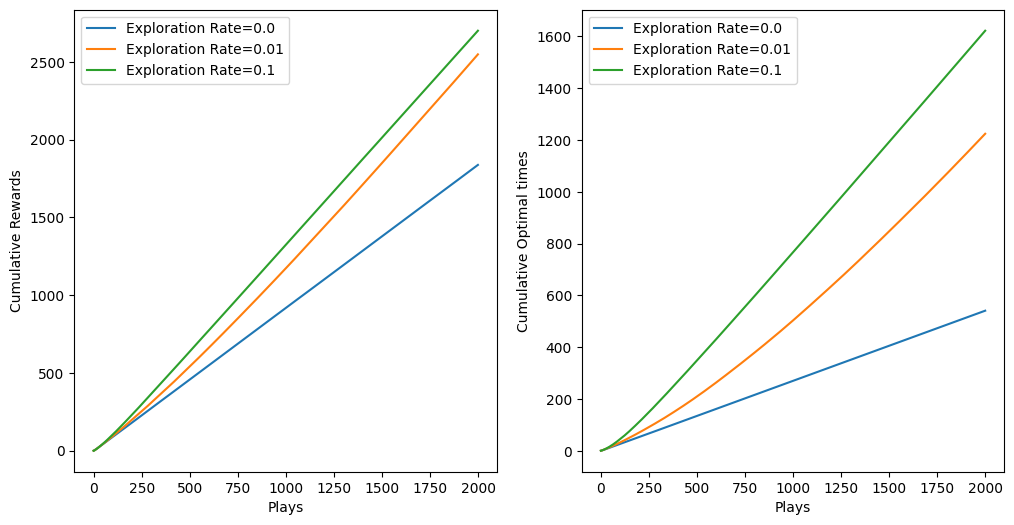

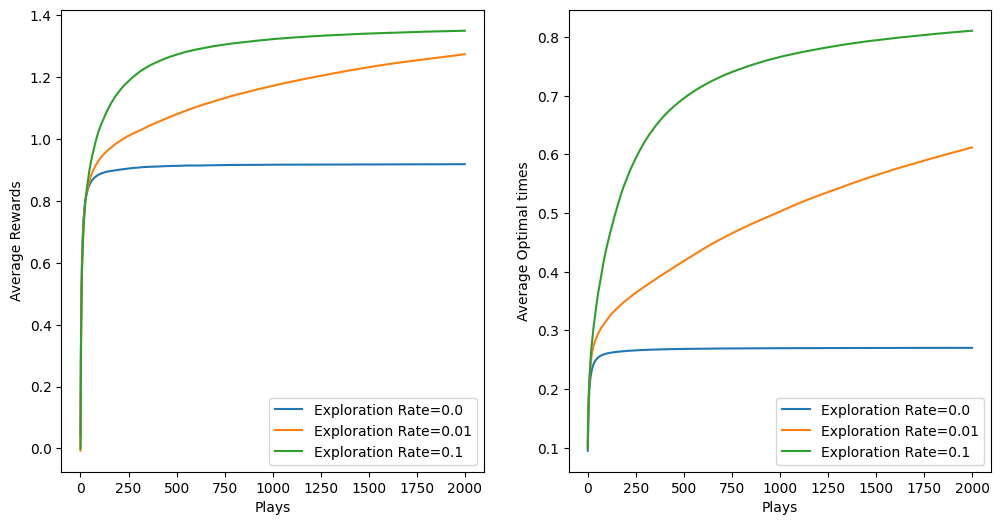

In [ ]:
# Using average results for plotting
plot_e_greedy(e_greedy_cum_avgRewards, e_greedy_cum_avgOptimal, 'Cumulative')
plot_e_greedy(e_greedy_avg_avgRewards, e_greedy_avg_avgOptimal, 'Average')

**Plotting UCB**

In [ ]:
def plot_ucb(rewards, optimal_times,label_1,title):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    # Plotting the rewards over time
    plt.plot(rewards)
    plt.xlabel('Plays')
    plt.ylabel(f'{label_1} Rewards')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    # Plotting the optimal times over time
    plt.plot(optimal_times)
    plt.xlabel('Plays')
    plt.ylabel(f'{label_1} Optimal times')
    plt.grid(True)
    plt.figtext(0.5, 0.95, f'{title} {label_1} Performance', ha='center', va='center', fontsize=16)
    plt.show()

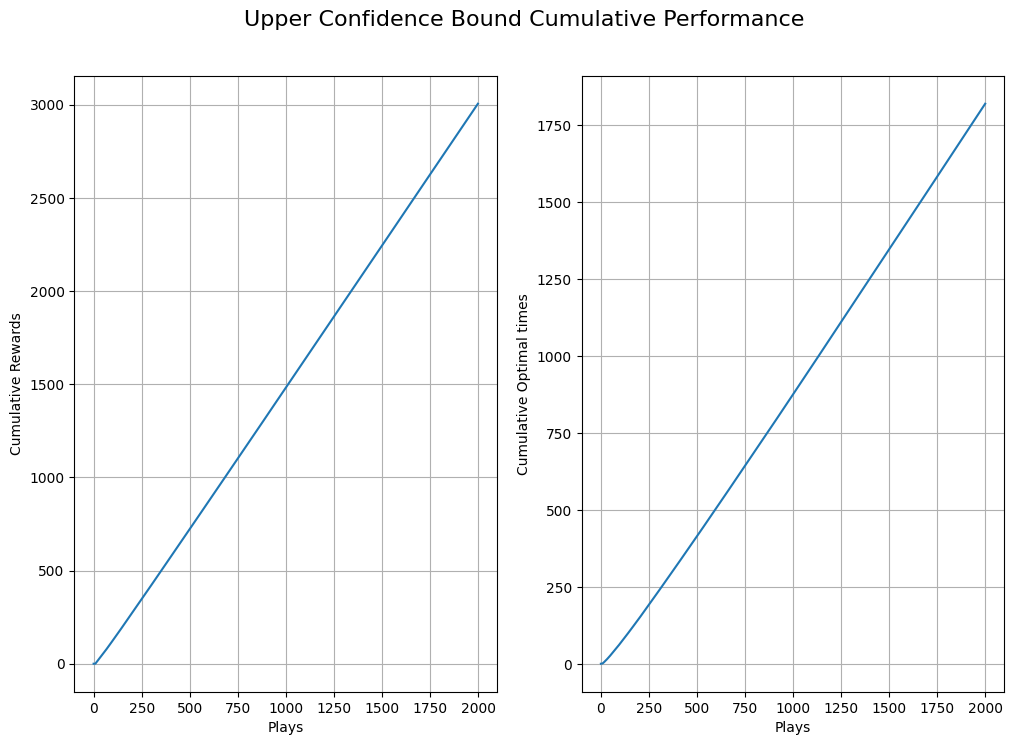

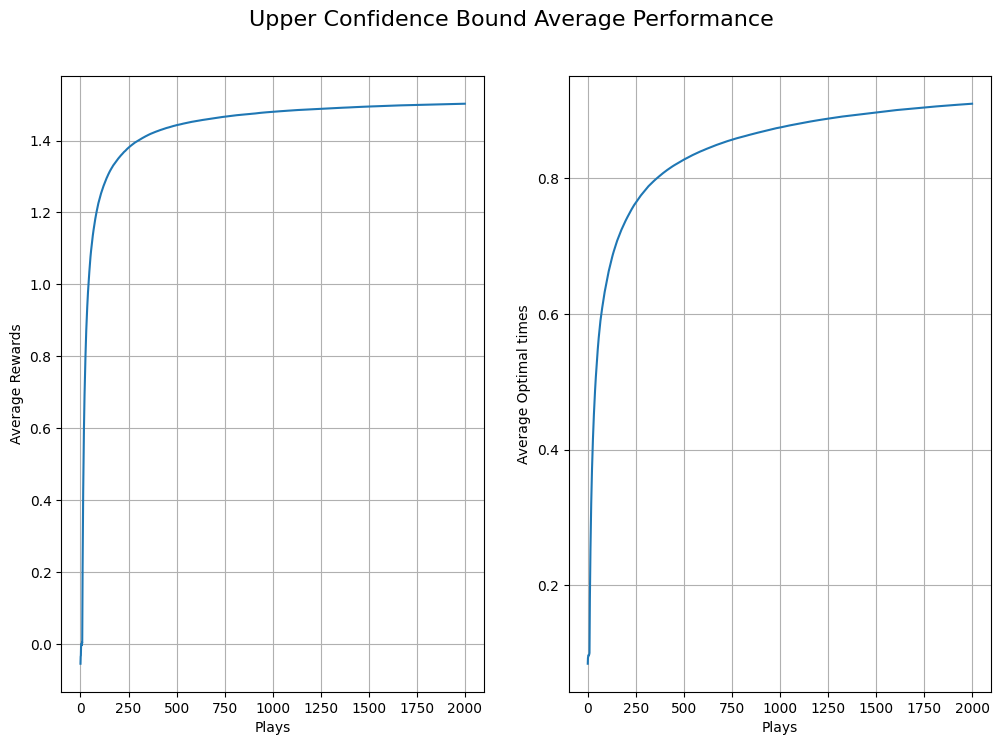

In [ ]:
plot_ucb(ucb_avg_cumRewards, ucb_avg_cumOptimal,'Cumulative','Upper Confidence Bound')
plot_ucb(ucb_avg_avgRewards, ucb_avg_avgOptimal,'Average','Upper Confidence Bound')

**Plotting TS**

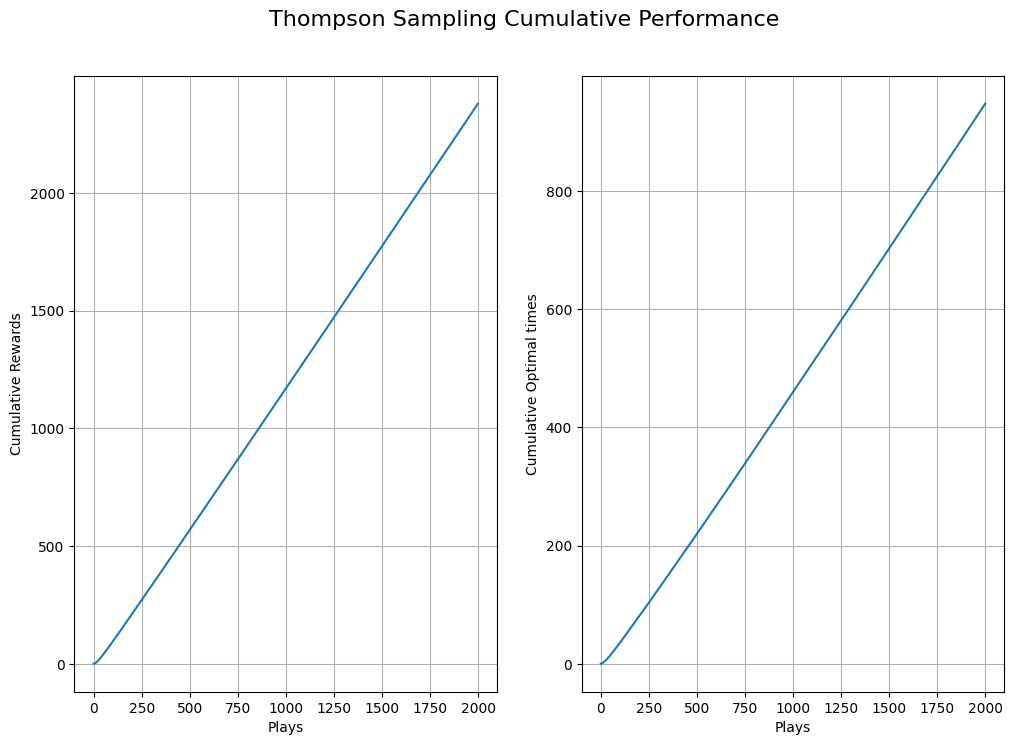

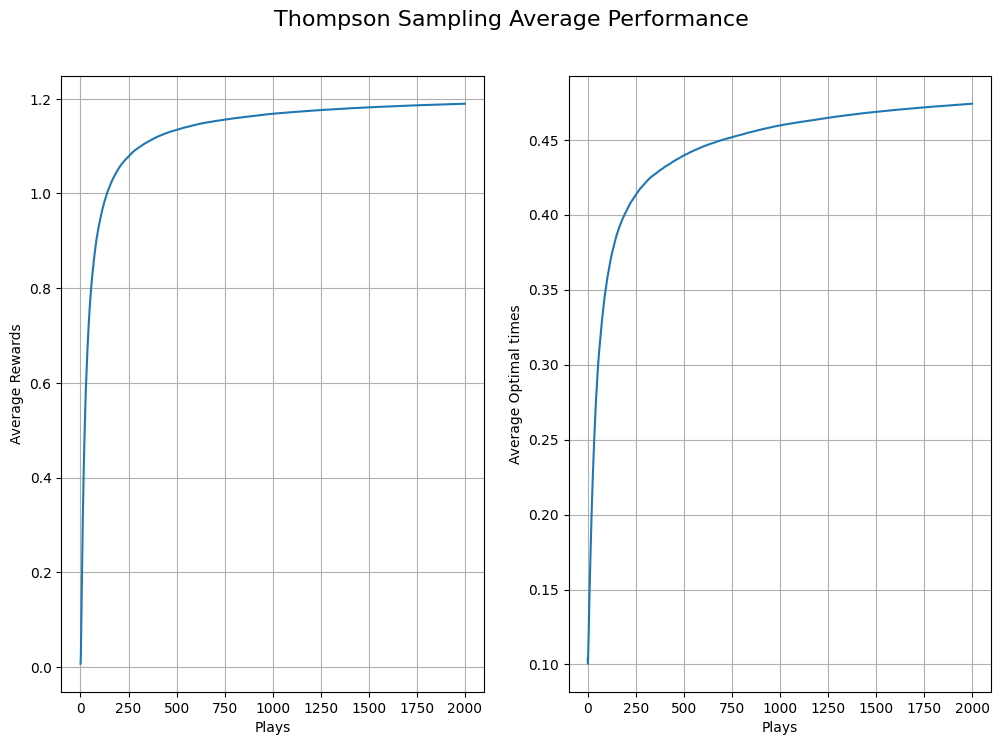

In [ ]:
plot_ucb(TS_avg_cumRewards, TS_avg_cumOptimal,'Cumulative','Thompson Sampling')
plot_ucb(TS_avg_avgRewards, TS_avg_avgOptimal,'Average','Thompson Sampling')

## **Comparison of Epsilon Greedy, Upper Confidence Bound, Thompson Sampling**

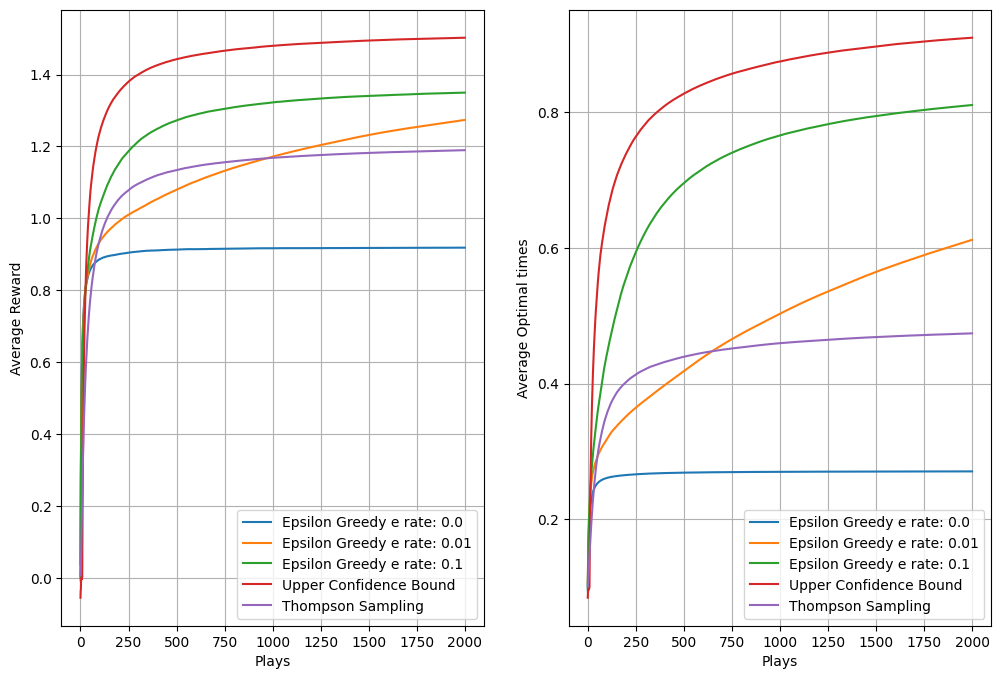

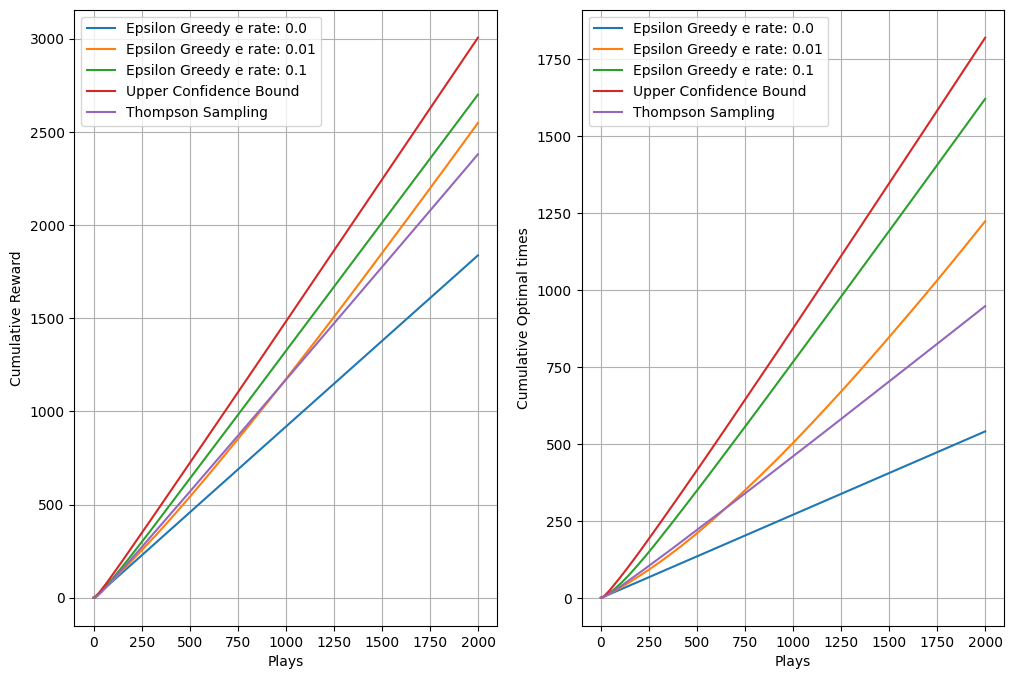

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
for rate, rewards in e_greedy_avg_avgRewards.items():
      plt.plot(rewards, label=f'Epsilon Greedy e rate: {rate}')
plt.plot(ucb_avg_avgRewards, label='Upper Confidence Bound')
plt.plot(TS_avg_avgRewards, label='Thompson Sampling')
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for rate, optimal_times in e_greedy_avg_avgOptimal.items():
      plt.plot(optimal_times, label=f'Epsilon Greedy e rate: {rate}')
plt.plot(ucb_avg_avgOptimal, label='Upper Confidence Bound')
plt.plot(TS_avg_avgOptimal, label='Thompson Sampling')
plt.xlabel('Plays')
plt.ylabel('Average Optimal times')
plt.legend()
plt.grid(True)

plt.show()


plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
for rate, rewards in e_greedy_cum_avgRewards.items():
      plt.plot(rewards, label=f'Epsilon Greedy e rate: {rate}')
plt.plot(ucb_avg_cumRewards, label='Upper Confidence Bound')
plt.plot(TS_avg_cumRewards, label='Thompson Sampling')
plt.xlabel('Plays')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for rate, optimal_times in e_greedy_cum_avgOptimal.items():
      plt.plot(optimal_times, label=f'Epsilon Greedy e rate: {rate}')
plt.plot(ucb_avg_cumOptimal, label='Upper Confidence Bound')
plt.plot(TS_avg_cumOptimal, label='Thompson Sampling')
plt.xlabel('Plays')
plt.ylabel('Cumulative Optimal times')
plt.legend()
plt.grid(True)

plt.show()